# PyFolding SI Notebook 7
---

[Author] ARL & ERGM

---

## Simulating an Ising model curve

Here we are going to generate an Ising model representation of a protein and simulate the unfolding curve. There are several steps:

1. Initialise domains with their appropriate values ($\Delta G$, $m$ etc..)
2. Build a topology with these domains
3. Create the partition function
4. Simulate!

Let's start with loading PyFolding:


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pyfolding
from pyfolding import ising, models

<IPython.core.display.Javascript object>

PyFolding: Jupyter autoscrolling has been disabled


In [2]:
# Lets see what modules we have by listing them
ising.list_models()

['CapDomain',
 'DecoupleCapDomain',
 'HelixDomain',
 'LoopDomain',
 'MutantCapDomain',
 'MutantLoopDomain',
 'MutantRepeatDomain',
 'RepeatDomain']

Now, we need some domains to build our protein. Let's use a cap domain and a repeat domain:

In [3]:
# NOTE: we need to instantiate these domains, hence the () after their names

cap = ising.CapDomain()
repeat = ising.RepeatDomain()

Now we need to set the domain properties:

In [4]:
cap.DG_i = -5.
cap.m_i = -1.5

repeat.DG_i = -1.
repeat.m_i = -2.5
repeat.DG_ij = -1.

Having defined the properties of the domains, we need to design a protein topology to represent the protein we're simulating. Let's use a cap and three repeats to define our simulated protein:

In [5]:
topology = [repeat, repeat, repeat, repeat, cap]

Let's plot our topology to make sure we've done everything correctly:

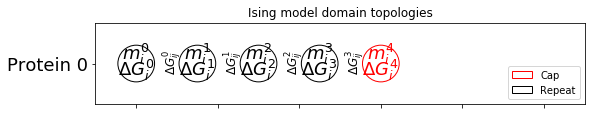

In [6]:
# NOTE: You can now save the domain image by using the save keyword:
# ising.plot_domains([topology], save="/Users/ubcg83a/Desktop/domains.pdf")

ising.plot_domains([topology], collapse=False) #, save="/Users/ERGM/Desktop/domains.pdf")



Having defined our protein topology, we can generate the partition function to go along with this:

In [7]:
partition = ising.IsingPartitionFunction( topology )
pyfolding.set_temperature(10.)

Set temperature to 10.00°C
(NOTE: Careful, this sets the temperature for all subsequent calculations)


Now we can simulate our protein unfolding over a certain concentration range:

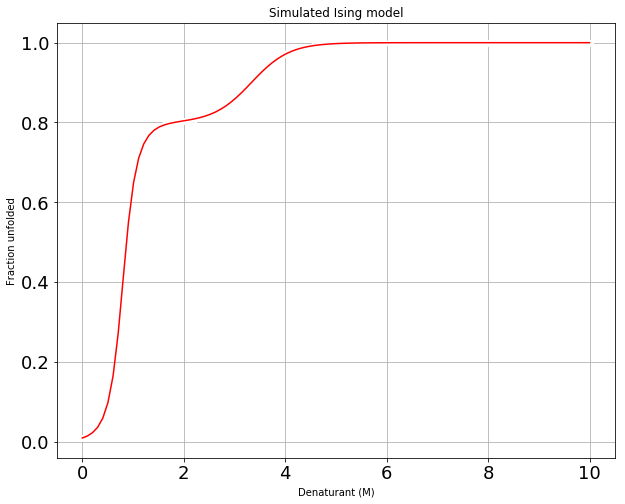

In [8]:
x = np.linspace(0.,10.,100) # range of denaturants, 0-10M with 100 points (i.e. every 0.1M)
y = partition.theta(x)

plt.figure(figsize=(10,8))
plt.plot(x,y,'wo', x,y,'r-')
plt.title("Simulated Ising model")
plt.xlabel('Denaturant (M)')
plt.ylabel('Fraction unfolded')
plt.grid(True)
plt.show()

Try changing a value of the model! Let's set $m_i$ for the repeat to -2.1:

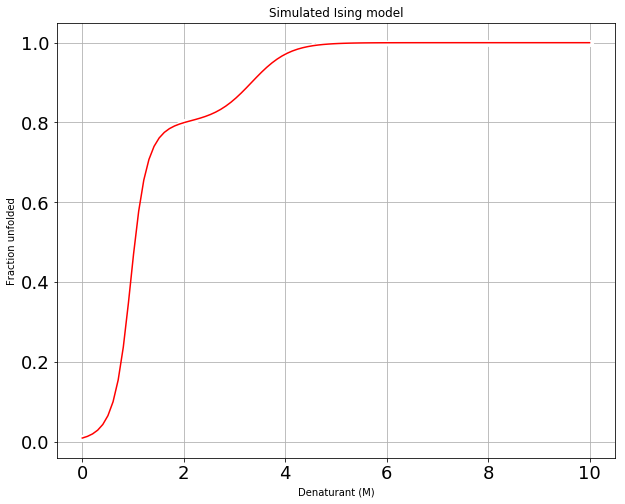

In [9]:
repeat.m_i = -2.1
y = partition.theta(x)

plt.figure(figsize=(10,8))
plt.plot(x,y,'wo', x,y,'r-')
plt.title("Simulated Ising model")
plt.xlabel('Denaturant (M)')
plt.ylabel('Fraction unfolded')
plt.grid(True)
plt.show()

---

### End of this Notebook.

---